Importing files and libraries

In [2]:

from astropy.io import fits  
from PyAstronomy.pyasl import foldAt
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from scipy import stats
from astropy.stats import sigma_clipped_stats
from photutils.aperture import CircularAperture
from photutils.aperture import aperture_photometry
root_dir = '/Users/mahderekalregass bua/Documents/TESS/astrocut_Eleonora_10/'
hdu = fits.open(root_dir+'Eleonora_1468.3078374839401-1475.8286396601638_15.0-x-10.0_astrocut.fits') #file downloaded from TESS database

Testing 

In [2]:
# testing header indcies 
print(hdu[1].header)

# figuring out array sizes
np.shape(hdu[1].data.TIME)


XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 3098 / length of dimension 1                          NAXIS2  =                  357 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                   16 / number of table fields                         TTYPE1  = 'TIME    '           / column name                                    TDISP1  = 'D14.7   '           / display format                                 TUNIT1  = 'BJD - 2457000, days' / unit                                          TFORM1  = 'D       '           / column format                                  TTYPE2  = 'TIMECORR'           / column 

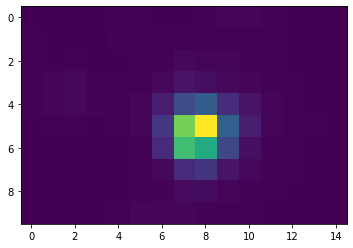

In [4]:
# seeing plots and looking for asteriods; test contd. 
plt.imshow(hdu[1].data.FLUX[50])

#print(hdu[1].data.FLUX[30]) #to print the array
#print(hdu[1].data.TIME)
#print(np.sum(hdu[1].data.FLUX[0]))

#print(len(hdu[1].data.FLUX[35]))

Iterate through all datapoints in Flux matrix and plot 

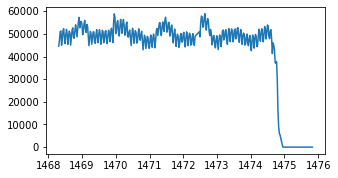

In [5]:
i = 0
time = hdu[1].data.TIME

newlist = []

while i < 357: 
    add = np.nansum(hdu[1].data.FLUX[i])
    newlist.append(add)
    i += 1
#print(newlist)    
  
figs, plt = plt.subplots(figsize=(5, 2.7))
plt.plot(time, newlist)    


## LombScargle and Binning 

figuring out periodicity

In [ ]:
i = 0
time = hdu[1].data.TIME

newlist = []

while i < 357: 
    add = np.nansum(hdu[1].data.FLUX[i])
    newlist.append(add)
    i += 1
#print(newlist)    

ls = LombScargle(time, newlist)
time, newlist =ls.autopower()
print(newlist.max())

#ls.false_alarm_probability(newlist.max())
plt.plot(time, newlist)    
plt.show()


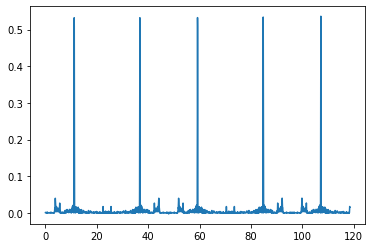

In [5]:


freq, p = LombScargle(time, n).autopower()


#ls.false_alarm_probability(newlist.max())
plt.plot(freq, p)    
plt.show()
#the nyquist frequency would be 1 cycle per hour for TESS data because we can only take two data points per hour 


#pullout the right peak and set the limit
#do aperture photometry and binning 

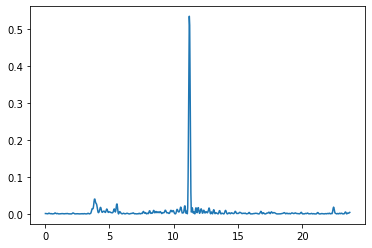

In [6]:
# zooming in to find the period for one curve
freq, p = LombScargle(time, n).autopower(nyquist_factor = 1)
plt.plot(freq, p)    
plt.show()

Preiod found!

In [7]:
peak_freq = np.where(p==max(p))
peak_time = 1/ freq[peak_freq][0] 
print(peak_time)
peak_time*24

#preiod is found to be 2 hours 

0.08916297833917551


2.139911480140212

Sanity Check/ period validation

In [8]:
24/11.2

2.142857142857143

Run first

Discarding data we do not need (empty images and naan vals)

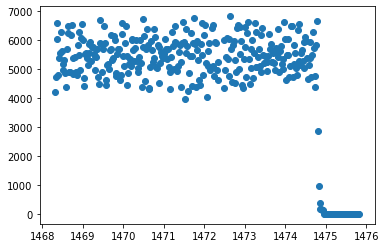

In [3]:
time = hdu[1].data.TIME
flux = hdu[1].data.FLUX
flux = np.nan_to_num(flux) #replaces nan with zero 
n = np.max(flux, axis=(1,2)) # takes the maximum of the fluxes from each of the images 
#print(n)
plt.scatter(time, n)

In [4]:
# using standard deviation to find the range of data we need
typical_flux = np.median(n) 
std_flux = np.std(n)
print(typical_flux)
print(std_flux)

inds_obj_in_frame, = np.where(n > typical_flux - (1.4*std_flux)) #returns the indicies of where the n is greater than a certain value 

time = time[inds_obj_in_frame]
n = n[inds_obj_in_frame]
#plt.scatter(time, n)

5338.9087
1958.7924


Plotting data within a cerain range (based on the standard deviation) from median val

5459.326
638.4701


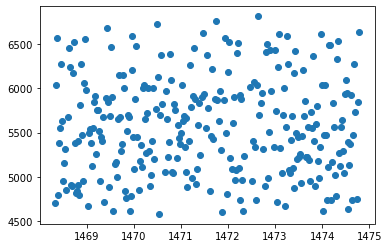

In [5]:
typical_flux = np.median(n)
std_flux = np.std(n)
print(typical_flux)
print(std_flux)

inds_obj_in_frame, = np.where(n > typical_flux - (1.4*std_flux))

time = time[inds_obj_in_frame]
n = n[inds_obj_in_frame]
plt.scatter(time, n)

Phase folding  relevant data from above using the period found from LombScargle function

(282,)


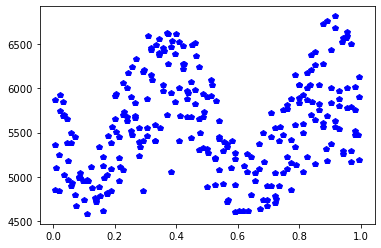

In [6]:
phases = foldAt(time, 4.27735/24., T0 = 0.0)

sortIndi = np.argsort(phases) # it gives the indicies of the sorted values 
phases = phases[sortIndi] 
n = n[sortIndi]

print(np.shape(n))
plt.plot(phases, n, 'bp')
plt.show()

Final Light Curve!!

(47,)
(47,)
(47,)


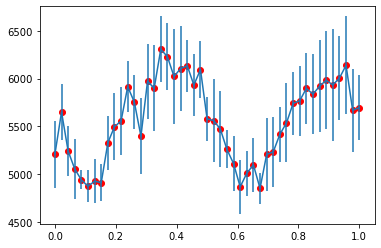

In [7]:
#bin_means, bin_edges, binnumber = stats.binned_statistic(phases, n , 'std', bins = 40)
#bin_width = (bin_edges[1] - bin_edges[0])
#print(bin_means, bin_edges, binnumber)
#print(len(bin_means))
#print(bin_edges)
#print(len(bin_edges))

num_bins = 6
#print(n)
#print(n.reshape(-1, num_bins))
median_result = np.average(n.reshape(-1, num_bins), axis=1)
std_result = np.std(n.reshape(-1, num_bins), axis=1)
print(np.shape(median_result))
print(np.shape(np.linspace(0,1,47)))
print(np.shape(std_result))
plt.errorbar(np.linspace(0, 1, 47), median_result, yerr=std_result)

#print(median_result)

#plt.plot(phases, n)
plt.scatter(np.linspace(0, 1, 47), median_result, color='r')

Index

In [6]:
from astropy.stats import sigma_clipped_stats
from photutils.datasets import load_star_image
hdu = load_star_image(hdu[1].data.FLUX[1])
data = hdu.data[0:401, 0:401]
mean, media, std = sigma_clipped_stats(data, sigma = 3.0)
print(mean, media, std)

TypeError: deprecated_renamed_argument() got an unexpected keyword argument 'message'

In [9]:
frame = 0
dataset = hdu[1].data
new = dataset.FLUX[frame]
positions = 8.0, 4.0
aperture = CircularAperture(positions, r = 1.5)
pix_count = []

for frame in range(288): 
    pix_count.append(aperture_photometry(new,aperture)['aperture_sum'][0]) 
    

    

TypeError: deprecated_renamed_argument() got an unexpected keyword argument 'message'

In [ ]:
print(np.shape(binnumber))
print(np.shape(bin_means))
print(np.shape(bin_edges))

In [ ]:
stats.binned_statistic(phases, n , 'std', bins = 20)

In [ ]:

plt.plot(dataset.FLUX[n][4])
dataset.FLUX(frame).max()

In [ ]:
i = 0
for i in range(len(bin_edges)):
    bin_edges[i] = bin_edges[i] - 1468.30783748



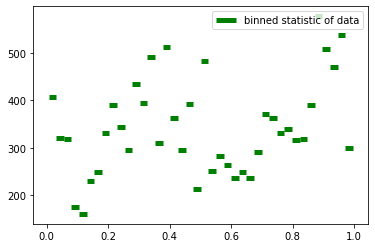

In [45]:
plt.figure()
#plt.plot(phases, n, 'b.', label='raw data')
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=5,
            label='binned statistic of data')
#plt.plot((binnumber - 0.5) * bin_width, n, 'g.', alpha = 0.5)
plt.legend()